# Load libraries

In [42]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [43]:
# import data

path = "../../../../thesis/work/plasticc_dataset/"

# Train data
# train = pd.read_csv(path + "training_set.csv")
# train = pd.read_csv(path + "plasticc_train_lightcurves.csv")
# # print("Training data set")
# # display(train.head())

# metadata
# metadata_train = pd.read_csv(path + "training_set_metadata.csv")
# metadata_train = pd.read_csv(path + "plasticc_train_metadata.csv")
# # print("Metadata for training dataset")
# # display(metadata_train.head())

# # Test data
test1 = pd.read_csv(path + "plasticc_test_set_batch1.csv")
# test2 = pd.read_csv(path + "plasticc_test_set_batch2.csv")
# print("Test data set: ", test.shape)
# display(test.head())

# test metadata
metadata_test = pd.read_csv(path + "plasticc_test_metadata.csv")
# # print("Metadata for test dataset: ", metadata_test.shape)
# # display(metadata_test.head())

# # merge data
# merged_data_train = train.merge(metadata_train, on = "object_id")
merged_data_test1 = test1.merge(metadata_test, on = "object_id")
# merged_data_test2 = test2.merge(metadata_test, on = "object_id")
# merged_data = merged_data_train.merge(merged_data_test, on = "object_id")
# data = pd.concat([merged_data_train, merged_data_test])
# print("train merged data")
# display(merged_data_train.head())

# print("test merged data")
# display(merged_data_test.head())

# print("test merged data")
# display(merged_data_test.head())
# # # display(merged_data_test.head())
# # merged_data_test["object_id"].hist()
# # merged_data_train["object_id"].hist()
# # display(merged_data.head())

# # print("train data: ", merged_data_train.shape)
# print("test data: ", merged_data_test.shape)

In [44]:
# data = pd.concat([merged_data_train, merged_data_test])
print("Shape of data to work: ", merged_data_test1.shape)
# print(merged_data_train.shape)
# print(merged_data_test2.shape)
print("Unique targets: ", merged_data_test1.true_target.unique().shape[0])
print("targets: ", merged_data_test1.true_target.unique())

Shape of data to work:  (10855958, 31)
Unique targets:  18
targets:  [ 42  90  16  67  62 993  92  52  88  65 991 992  15  95   6  53 994  64]


In [45]:
# print(merged_data_test1.true_target.unique())
# train_target = merged_data_train.target.unique()
# merged_data_test1_filter = merged_data_test1.loc[merged_data_test1['true_target'].isin(train_target)]

In [162]:
# amount = merged_data_test1_filter.groupby("true_target").count()
amount = merged_data_test1.groupby("true_target").count()
display(amount.sort_values(by=['object_id'], ascending = False))
# display(amount)
# amount.index

# choose for remove classes
removing_classes = False
if removing_classes:
    
    classes_to_remove = [42, 90, 62]
    amount = amount.drop(classes_to_remove)
    
else:
    
    # > 1MM
    classes_to_analyze = [42, 90]
    # < 1MM and > 100K
#     classes_to_analyze = [62, 52, 88, 67]
#     # < 100k and > 10k
#     classes_to_analyze = [993, 92, 95, 15, 65, 992]
    # < 10k and > 0
#     classes_to_analyze = [991, 994, 53, 6, 16, 64]
#     993 until last one
#     classes_to_analyze = [x for x in merged_data_test1["true_target"].unique() if x not in [42, 90, 62, 52, 88, 67]]
    amount = amount.loc[classes_to_analyze, :]
    

display(amount)

,object_id,mjd,passband,flux,flux_err,detected_bool,ra,decl,ddf_bool,hostgal_specz,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
true_target,,,,,,,,,,,,,,,,,,,,,
42,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,...,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846
90,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,...,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048
62,722642,722642,722642,722642,722642,722642,722642,722642,722642,722642,...,722642,722642,722642,722642,722642,722642,722642,722642,722642,722642
52,267001,267001,267001,267001,267001,267001,267001,267001,267001,267001,...,267001,267001,267001,267001,267001,267001,267001,267001,267001,267001
88,118433,118433,118433,118433,118433,118433,118433,118433,118433,118433,...,118433,118433,118433,118433,118433,118433,118433,118433,118433,118433
67,118042,118042,118042,118042,118042,118042,118042,118042,118042,118042,...,118042,118042,118042,118042,118042,118042,118042,118042,118042,118042
993,47089,47089,47089,47089,47089,47089,47089,47089,47089,47089,...,47089,47089,47089,47089,47089,47089,47089,47089,47089,47089
92,45886,45886,45886,45886,45886,45886,45886,45886,45886,45886,...,45886,45886,45886,45886,45886,45886,45886,45886,45886,45886
95,32081,32081,32081,32081,32081,32081,32081,32081,32081,32081,...,32081,32081,32081,32081,32081,32081,32081,32081,32081,32081


,object_id,mjd,passband,flux,flux_err,detected_bool,ra,decl,ddf_bool,hostgal_specz,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
true_target,,,,,,,,,,,,,,,,,,,,,
42,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,...,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846
90,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,...,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048


([0, 1], <a list of 2 Text xticklabel objects>)

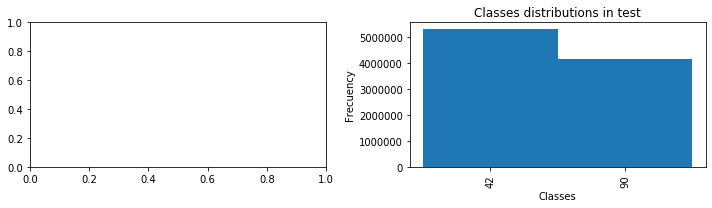

In [163]:
# plotting classes
fig, ax = plt.subplots(1, 2, figsize = (10, 3), tight_layout = True)
# ax = fig.add_axes([0,0,1,1])
# plt.bar(objects_per_target.index, objects_per_target)
# ax[0].hist(merged_data_train.loc[:, "target"], density = True)
# ax[0].set_xlabel("Classes")
# ax[0].set_ylabel("Frecuency")
# ax[0].set_title("Classes distributions in train")

# ax[1].hist(merged_data_test1.true_target, bins = 18)
ax[1].bar([str(x) for x in  amount.index.tolist()], amount.object_id.values, width = 1)
# ax[1].hist(merged_data_test1_filter.true_target, bins = 14)
ax[1].set_xlabel("Classes")
ax[1].set_ylabel("Frecuency")
ax[1].set_title("Classes distributions in test")
# ax[1].hist(merged_data_test.loc[:, "target"])
plt.xticks(rotation=90)

# objects_per_target_train = merged_data_train.groupby("target", )["object_id"].count()
# display(objects_per_target)
# # fig, ax = plt.subplots(1, 2)
# # # ax = fig.add_axes([0,0,1,1])
# ax[0].bar(objects_per_target.index, objects_per_target)
# # ax[0].hist(merged_data_train["object_id"])

# Change name of dataset for simplicity

In [164]:
# light_curves = merged_data_train
# light_curves = merged_data_test1_filter
light_curves = merged_data_test1
# light_curves = merged_data_train[(merged_data_train["object_id"] == 615)]

print("data shape: ", light_curves.shape)
# print("data columns: ", light_curves.columns)
print("original objects ids: ", light_curves.object_id.unique().shape)
print("original classes: ", light_curves.true_target.unique().shape)

# getting only useful features
light_curves_ = light_curves[["object_id", "mjd", "passband", "flux", "flux_err", "true_target"]]
light_curves_ = light_curves_.rename(columns={"true_target": "target"})
# ligth_curves_.head()

light_curves = light_curves_
print("original classes: ", light_curves_.target.unique())

# Taking a subgroup of classes
if removing_classes:
    # get classes to analyze removing classes_to_remove
    light_curves = light_curves.loc[light_curves["target"].isin([x for x in light_curves["target"].unique() if x not in classes_to_remove])]
else:
    # for take only a part of classes and remove anothers ones
    light_curves = light_curves.loc[light_curves["target"].isin(classes_to_analyze)]
      
print("Final shape dataset to analyze: ", light_curves.shape)
print("Final classes: ", light_curves.target.unique().shape)
print("Total objects: ", light_curves.object_id.unique().shape)
print("final classes: ", light_curves.target.unique())

data shape:  (10855958, 31)
original objects ids:  (32926,)
original classes:  (18,)
original classes:  [ 42  90  16  67  62 993  92  52  88  65 991 992  15  95   6  53 994  64]
Final shape dataset to analyze:  (9440894, 6)
Final classes:  (2,)
Total objects:  (28626,)
final classes:  [42 90]


# Feature extraction

In [165]:
# get all object_ids
object_ids = light_curves["object_id"].unique()

print("There are " + str(object_ids.shape[0]) + " differentes objects, classified in "+ str(light_curves["target"].unique().shape[0]) + " differentes classes")
print(type(object_ids))

# overwrite objects ids (it's for analyze a piece of total objects's)
# objects_ids_to_analyze = object_ids.shape[0]
objects_ids_to_analyze = int(object_ids.shape[0])
# objects_ids_to_analyze = 1000
print("objects to analyze: ", objects_ids_to_analyze)
idx = np.random.randint(object_ids.shape[0], size=objects_ids_to_analyze)
object_ids = object_ids[idx]
# object_ids = object_ids[0:objects_ids_to_analyze]
# print(object_ids)

# set passband to analyze
passband = 0

features_names = ['Amplitude',
                  'AndersonDarling', 
                  'Autocor_length', 
                  'Beyond1Std', 
                  'CAR_mean',
                  'CAR_sigma', 
                  'CAR_tau', 
                  'Con', 
                  'Eta_e', 
                  'FluxPercentileRatioMid20',
                 'FluxPercentileRatioMid35', 
                  'FluxPercentileRatioMid50',
                 'FluxPercentileRatioMid65' ,
                  'FluxPercentileRatioMid80',
                 'Freq1_harmonics_amplitude_0' ,
                  'Freq1_harmonics_amplitude_1',
                 'Freq1_harmonics_amplitude_2' ,
                  'Freq1_harmonics_amplitude_3',
                 'Freq1_harmonics_rel_phase_0' ,
                  'Freq1_harmonics_rel_phase_1',
                 'Freq1_harmonics_rel_phase_2' ,
                  'Freq1_harmonics_rel_phase_3',
                 'Freq2_harmonics_amplitude_0' ,
                  'Freq2_harmonics_amplitude_1',
                 'Freq2_harmonics_amplitude_2' ,
                  'Freq2_harmonics_amplitude_3',
                 'Freq2_harmonics_rel_phase_0' ,
                  'Freq2_harmonics_rel_phase_1',
                 'Freq2_harmonics_rel_phase_2' ,
                  'Freq2_harmonics_rel_phase_3',
                 'Freq3_harmonics_amplitude_0' ,
                  'Freq3_harmonics_amplitude_1',
                 'Freq3_harmonics_amplitude_2' ,
                  'Freq3_harmonics_amplitude_3',
                 'Freq3_harmonics_rel_phase_0' ,
                  'Freq3_harmonics_rel_phase_1',
                 'Freq3_harmonics_rel_phase_2' ,
                  'Freq3_harmonics_rel_phase_3' ,
                  'Gskew',
                 'LinearTrend',
                  'MaxSlope', 
                  'Mean', 
                  'Meanvariance', 
                  'MedianAbsDev', 
                  'MedianBRP',
                 'PairSlopeTrend', 
                  'PercentAmplitude',
                  'PercentDifferenceFluxPercentile',
                 'PeriodLS',
                  'Period_fit',
                  'Psi_CS', 
                  'Psi_eta' ,
                  'Q31', 
                  'Rcs', 
                  'Skew',
                 'SlottedA_length',
                  'SmallKurtosis',
                  'Std',
                  'StetsonK' ,
                  'StetsonK_AC',
                 'StructureFunction_index_21',
                  'StructureFunction_index_31',
                 'StructureFunction_index_32'
                 ]

# # Getting one ligth curve for get ist features names
# mask1 = light_curves["object_id"] == 615
# mask2 = light_curves["passband"] == passband
# lc = light_curves[(mask1 & mask2)]

# # array with required data
# lc_data = [lc.mjd, lc.flux, lc.flux_err]

# # getting features
# fs = feets.FeatureSpace(data = ["time", "magnitude", "error"])
# # get features names
# features, values = fs.extract(*lc_data)
# features_names = features
# print(features_names)

There are 28626 differentes objects, classified in 2 differentes classes
<class 'numpy.ndarray'>
objects to analyze:  28626


In [152]:
from tqdm import tqdm_notebook
import feets.preprocess

# # get all object_ids
# object_ids = light_curves["object_id"].unique()

# print("There are " + str(object_ids.shape[0]) + " differentes objects, classified in "+ str(light_curves["target"].unique().shape[0]) + " differentes classes")
# print(type(object_ids))

# # overwrite objects ids (it's for analyze a piece of total objects's)
# # objects_ids_to_analyze = object_ids.shape[0]
# objects_ids_to_analyze = int(object_ids.shape[0])
# # objects_ids_to_analyze = 1000
# print("objects to analyze: ", objects_ids_to_analyze)
# idx = np.random.randint(object_ids.shape[0], size=objects_ids_to_analyze)
# object_ids = object_ids[idx]
# # object_ids = object_ids[0:objects_ids_to_analyze]
# # print(object_ids)

# # set passband to analyze
# passband = 0

# # features to extract from light curves

# features_names = ['Amplitude',
#                   'AndersonDarling', 
#                   'Autocor_length', 
#                   'Beyond1Std', 
#                   'CAR_mean',
#                   'CAR_sigma', 
#                   'CAR_tau', 
#                   'Con', 
#                   'Eta_e', 
#                   'FluxPercentileRatioMid20',
#                  'FluxPercentileRatioMid35', 
#                   'FluxPercentileRatioMid50',
#                  'FluxPercentileRatioMid65' ,
#                   'FluxPercentileRatioMid80',
#                  'Freq1_harmonics_amplitude_0' ,
#                   'Freq1_harmonics_amplitude_1',
#                  'Freq1_harmonics_amplitude_2' ,
#                   'Freq1_harmonics_amplitude_3',
#                  'Freq1_harmonics_rel_phase_0' ,
#                   'Freq1_harmonics_rel_phase_1',
#                  'Freq1_harmonics_rel_phase_2' ,
#                   'Freq1_harmonics_rel_phase_3',
#                  'Freq2_harmonics_amplitude_0' ,
#                   'Freq2_harmonics_amplitude_1',
#                  'Freq2_harmonics_amplitude_2' ,
#                   'Freq2_harmonics_amplitude_3',
#                  'Freq2_harmonics_rel_phase_0' ,
#                   'Freq2_harmonics_rel_phase_1',
#                  'Freq2_harmonics_rel_phase_2' ,
#                   'Freq2_harmonics_rel_phase_3',
#                  'Freq3_harmonics_amplitude_0' ,
#                   'Freq3_harmonics_amplitude_1',
#                  'Freq3_harmonics_amplitude_2' ,
#                   'Freq3_harmonics_amplitude_3',
#                  'Freq3_harmonics_rel_phase_0' ,
#                   'Freq3_harmonics_rel_phase_1',
#                  'Freq3_harmonics_rel_phase_2' ,
#                   'Freq3_harmonics_rel_phase_3' ,
#                   'Gskew',
#                  'LinearTrend',
#                   'MaxSlope', 
#                   'Mean', 
#                   'Meanvariance', 
#                   'MedianAbsDev', 
#                   'MedianBRP',
#                  'PairSlopeTrend', 
#                   'PercentAmplitude',
#                   'PercentDifferenceFluxPercentile',
#                  'PeriodLS',
#                   'Period_fit',
#                   'Psi_CS', 
#                   'Psi_eta' ,
#                   'Q31', 
#                   'Rcs', 
#                   'Skew',
#                  'SlottedA_length',
#                   'SmallKurtosis',
#                   'Std',
#                   'StetsonK' ,
#                   'StetsonK_AC',
#                  'StructureFunction_index_21',
#                   'StructureFunction_index_31',
#                  'StructureFunction_index_32'
#                  ]

# # # Getting one ligth curve for get ist features names
# # mask1 = light_curves["object_id"] == 615
# # mask2 = light_curves["passband"] == passband
# # lc = light_curves[(mask1 & mask2)]

# # # array with required data
# # lc_data = [lc.mjd, lc.flux, lc.flux_err]

# # # getting features
# # fs = feets.FeatureSpace(data = ["time", "magnitude", "error"])
# # # get features names
# # features, values = fs.extract(*lc_data)
# # features_names = features
# # print(features_names)

# # select features
# # from 0:10 and remove AndersonDarling and FluxPercentileRatioMid20 it have an error: AttributeError: 'int' object has no attribute 'keys'
# features_names = features_names[0:5].tolist()
# features_names.remove("AndersonDarling")
# # features_names.remove("FluxPercentileRatioMid20")
# print((features_names))

print("features to get: ", features_names)

# array of features values
features_values = np.zeros((len(object_ids), len(features_names)))

# array of targets (classes)
targets = np.zeros(len(object_ids))

# iterate through each object id
for index, object_id in enumerate(tqdm_notebook(object_ids)):
    print("object id: ", object_id)
    
    # Getting each ligth curve
    mask1 = light_curves["object_id"] == object_id
    mask2 = light_curves["passband"] == passband
    lc = light_curves[(mask1 & mask2)]
    
    # array with required data
    lc_data = [lc.mjd, lc.flux, lc.flux_err]
    
#     # preprocessing
#     time, mag, error = feets.preprocess.remove_noise(time = lc.mjd, magnitude = lc.flux, error = lc.flux_err)
    
    # feature extraction
    fs = feets.FeatureSpace(only = features_names, data = ["time", "magnitude", "error"])
#     # get all features it can obteins with available data (parameter) 
#     fs = feets.FeatureSpace(data = ["time", "magnitude", "error"])
    features, values = fs.extract(*lc_data)
    
    # add features to features values arrays
    features_values[index, :] = values
    
    # get target of object
    targets[index] = lc.iloc[0, -1]
#     print(features.shape)
    
#     print(values)
#     print(index)

features to get:  ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35', 'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65', 'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0', 'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0', 'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0', 'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2', 'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0', 'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2', 'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_0', 'Freq3_harmonics_rel_phase_1', 'Freq3_harmonics_rel_phase_2', 'Freq3_harmo

object id:  289877
object id:  156731


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  93049
object id:  161224
object id:  298226
object id:  81319


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  253649
object id:  107780
object id:  231522
object id:  4025


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  45395
object id:  168


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  329636


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=

object id:  330535
object id:  298226


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  331894
object id:  253649


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  72907
object id:  63782


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


object id:  161224


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  149344
object id:  230192


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=

object id:  112314
object id:  259823
object id:  107780


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  161224


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  268222
object id:  253649


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  80421
object id:  63782
object id:  268222


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  112314



/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [154]:
# concatenate the feautres and targets of objects
features_values_with_targets = np.c_[ features_values, targets ]
# print(features_values_with_targets.shape)

# add target to name (for columns names)
columns = features_names + ["target"]
# print(columns)

# create new dataframe
features_light_curves = pd.DataFrame(data = features_values_with_targets,    # values
                                      index = object_ids,    # 1st column as index
                                      columns = columns
                                    )

# display new dataframe
display(features_light_curves.head())
print("features light curves shape: ",features_light_curves.shape )
print("Differens objects ids: "+ str(features_light_curves.shape[0]))
display(features_light_curves.describe())
display(features_light_curves["target"].unique().shape)
display(features_light_curves["target"].unique())

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
289877,4.251193,0.335211,1.0,0.269841,0.585959,-8.281094e-08,0.594536,0.000000,267.733301,0.123844,...,0.329153,1.0,1.201358,2.306238,0.782449,0.739155,1.215765,1.362518,1.310116,53.0
156731,3.706352,0.731221,1.0,0.269841,-0.251551,-1.901208e-07,0.595311,0.000000,288.381892,0.130051,...,-0.198162,1.0,1.590628,2.097453,0.795113,0.624572,1.693675,2.243351,1.380988,64.0
93049,10.418507,1.000000,2.0,0.111111,0.018823,1.228819e+00,61.420457,0.000000,55.935706,0.111455,...,2.990506,2.0,12.945516,5.066205,0.677410,0.506107,2.031135,3.004450,1.491350,991.0
161224,4.898978,0.999826,1.0,0.242857,2.392518,6.410737e+00,0.058253,0.000000,221.216813,0.098867,...,-0.967144,1.0,1.300523,2.324108,0.753172,0.539936,1.386365,1.636937,1.338028,53.0
298226,191.713804,1.000000,4.0,0.100000,0.845831,1.827619e+01,38.582110,0.044118,2.867647,0.005744,...,3.091790,7.0,9.458542,95.407549,0.486762,0.669550,2.175345,3.367653,1.612314,6.0


features light curves shape:  (32, 64)
Differens objects ids: 32


,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
count,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,53.979672,0.770819,3.031250,0.247433,0.564178,3.708057e+00,116.691054,0.012107,241.492994,0.117066,...,0.673728,5.343750,2.578052,34.450267,0.755426,0.675653,1.616833,2.126689,1.379326,422.843750
std,101.913556,0.283671,3.685056,0.092175,1.000812,6.288511e+00,262.171096,0.021649,276.913073,0.089643,...,1.329075,10.225236,4.441818,69.720798,0.109130,0.086197,0.287706,0.624799,0.137964,478.607598
min,3.175612,0.200047,1.000000,0.069444,-0.671928,-5.528553e+00,0.054960,0.000000,0.397370,0.005744,...,-0.967144,1.000000,-1.393628,1.672100,0.469888,0.506107,1.215765,1.362518,1.150774,6.000000
25%,4.133655,0.455527,1.000000,0.194444,-0.016556,-6.625852e-08,0.593558,0.000000,18.926808,0.064187,...,-0.159553,1.000000,-0.147629,2.174142,0.721475,0.614195,1.386365,1.633926,1.307432,16.000000
50%,5.065458,0.999172,1.000000,0.266865,0.145023,1.058352e-01,0.595196,0.000000,218.729288,0.117549,...,0.256006,1.000000,1.026133,2.579903,0.794772,0.669550,1.583825,2.020104,1.339245,53.000000
75%,24.596898,1.000000,4.000000,0.328571,0.833202,6.410737e+00,61.765428,0.008929,271.444166,0.151092,...,1.327919,5.000000,3.408295,12.318682,0.814549,0.745270,1.765305,2.409763,1.478331,991.000000
max,327.254470,1.000000,13.000000,0.428571,3.788980,1.827619e+01,1214.093477,0.057143,1042.506724,0.489200,...,3.466777,51.000000,17.056273,231.753846,0.926022,0.835131,2.251127,3.569263,1.612314,994.000000


(6,)

array([ 53.,  64., 991.,   6., 994.,  16.])

In [155]:
# checking if it contains nan values
features_light_curves = features_light_curves.dropna()
print("Missing values: ", features_light_curves.isnull().sum().sum())

Missing values:  0


# Saving features light curves dataset in file

In [156]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")

# store dataframe
features_light_curves.to_csv(index=False, path_or_buf = "/home/leo/Desktop/master_UACH/thesis/work/features_with_" + str(features_light_curves.shape[0]) + "_objects_and_" + str(features_light_curves.target.unique().shape[0]) + "_classes_and_" + str(len(features_names)) + "_features_" + timestr + ".csv")

In [137]:
# features distributions
if len(features_names) < 4:
    
    fig, ax = plt.subplots( 1, (len(features_names)), tight_layout = True, figsize = (8, 3))
    for i, f in enumerate(range(0, 4)):
        
        #     print(i, f)
        ax[i].hist(features_light_curves.iloc[:, f])
        ax[i].set_title(features_names[f])
        
else:
    
    print("Not plotting because it has too much features!")

Not plotting because it has too much features!


# Load csv file of features

In [176]:
path = "../../../../thesis/work/"

# features with full data
features_light_curves = pd.read_csv(path + "features_with_test_10MM")
features_light_curves = features_light_curves.loc[:, ~features_light_curves.columns.str.contains('^Unnamed')]

#features with 2 classes
features_light_curves = pd.read_csv(path + "features_with_28624_objects_and_2_classes_and_63_features_20191213-135652.csv")

#features with 4 classes
features_light_curves = pd.read_csv(path + "features_with_3726_objects_and_4_classes_and_63_features_20191213-143431.csv")

# display data
display(features_light_curves.head())

# describe data
display(features_light_curves.describe())

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
0,4.668316,0.949767,1.0,0.236111,-0.209654,1.725698e+00,0.677328,0.0,192.264772,0.187264,...,-0.067312,1.0,3.291638,2.573522,0.808859,0.716136,1.284379,1.390116,1.397126,62.0
1,4.034362,0.261110,1.0,0.300000,-0.111283,5.888917e-08,0.594435,0.0,1644.845038,0.071834,...,0.167777,1.0,-0.156607,2.170286,0.834385,0.752006,1.293266,1.337479,1.132904,62.0
2,3.931064,0.540534,1.0,0.319444,-0.766161,-3.169298e-07,0.595196,0.0,232.669839,0.214125,...,-0.045778,1.0,0.304734,2.043224,0.825682,0.654316,1.555607,1.863382,1.389074,62.0
3,4.338210,0.366353,1.0,0.400000,0.422736,4.014187e-08,0.595147,0.0,1177.677374,0.062063,...,0.125953,1.0,-0.395335,2.374054,0.836976,0.711427,1.498150,1.863007,1.333254,62.0
4,3.456015,0.683729,1.0,0.333333,1.018955,-3.169298e-07,0.595196,0.0,342.464563,0.110176,...,-0.422296,1.0,0.304357,1.909690,0.768109,0.757933,1.443391,1.819909,1.405248,62.0


,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
count,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3.726000e+03,3.726000e+03,3726.000000,3726.000000,3726.000000,...,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000
mean,5.027580,0.710354,1.470478,0.291355,0.057522,5.933293e-01,1.286318e+06,0.000967,349.730820,0.142520,...,0.081771,2.326892,0.752406,2.645315,0.799296,0.685936,1.534265,1.918277,1.347522,62.851315
std,4.482489,0.265312,1.696443,0.051087,3.626934,1.890706e+00,5.551244e+07,0.005914,338.981299,0.047250,...,0.524440,7.446450,1.582172,2.816984,0.036870,0.073911,0.203406,0.466942,0.131154,9.376275
min,2.314356,0.117757,1.000000,0.028571,-171.272003,-8.271349e+00,4.192365e-02,0.000000,1.548420,0.019616,...,-1.734267,1.000000,-1.735072,1.297112,0.404625,0.366027,0.750834,-0.140536,0.910939,52.000000
25%,3.731921,0.479408,1.000000,0.263889,-0.189260,-2.080839e-07,5.941426e-01,0.000000,187.222180,0.110429,...,-0.236695,1.000000,-0.013269,1.932086,0.780412,0.641039,1.392946,1.589056,1.259194,62.000000
50%,4.139556,0.777347,1.000000,0.291667,0.024388,1.410248e-07,5.951345e-01,0.000000,225.703406,0.138439,...,0.054457,1.000000,0.469851,2.120275,0.801000,0.694519,1.523078,1.876297,1.343980,62.000000
75%,4.706571,0.967775,1.000000,0.319444,0.284185,7.353981e-01,2.473364e+00,0.000000,283.460412,0.167884,...,0.348848,1.000000,1.150039,2.365244,0.821134,0.738469,1.671309,2.228505,1.441278,62.000000
max,94.575007,1.000000,16.000000,0.507937,20.044806,1.093338e+01,2.396377e+09,0.081967,2094.966107,0.476175,...,6.049200,259.000000,47.742440,53.365596,0.971144,0.909867,2.170383,3.442399,1.900264,88.000000


# Dimensionality reduction PCA

In [177]:
print("Full Dataframe (with labels)")
display(features_light_curves.head())

# print("Dataframe to input PCA")
# display(features_light_curves.iloc[:, 0: len(features_names)].head())

Full Dataframe (with labels)


,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
0,4.668316,0.949767,1.0,0.236111,-0.209654,1.725698e+00,0.677328,0.0,192.264772,0.187264,...,-0.067312,1.0,3.291638,2.573522,0.808859,0.716136,1.284379,1.390116,1.397126,62.0
1,4.034362,0.261110,1.0,0.300000,-0.111283,5.888917e-08,0.594435,0.0,1644.845038,0.071834,...,0.167777,1.0,-0.156607,2.170286,0.834385,0.752006,1.293266,1.337479,1.132904,62.0
2,3.931064,0.540534,1.0,0.319444,-0.766161,-3.169298e-07,0.595196,0.0,232.669839,0.214125,...,-0.045778,1.0,0.304734,2.043224,0.825682,0.654316,1.555607,1.863382,1.389074,62.0
3,4.338210,0.366353,1.0,0.400000,0.422736,4.014187e-08,0.595147,0.0,1177.677374,0.062063,...,0.125953,1.0,-0.395335,2.374054,0.836976,0.711427,1.498150,1.863007,1.333254,62.0
4,3.456015,0.683729,1.0,0.333333,1.018955,-3.169298e-07,0.595196,0.0,342.464563,0.110176,...,-0.422296,1.0,0.304357,1.909690,0.768109,0.757933,1.443391,1.819909,1.405248,62.0


In [178]:
# Standarizing data
from sklearn.preprocessing import StandardScaler

# Standarize data
# this does not consider the last column (it's the target)
std_features_light_curves = StandardScaler().fit_transform(features_light_curves.iloc[:, 0: len(features_names)])

# print(std_features_light_curves.shape)
# print(len(features_names))
# plot standardized 
if len(features_light_curves.columns) < 3:
    
    fig, ax = plt.subplots( 1, (len(features_names)), tight_layout = True, figsize = (8, 3))
    for i, f in enumerate(range(0, 4)):
    #     print(i, f)
        ax[i].hist(std_features_light_curves[:, f])
        ax[i].set_title(features_names[f])
        
else:
    
    print("Not ploting features because they are a lot !")

Not ploting features because they are a lot !


In [179]:
# PCA 
from sklearn.decomposition import PCA

n_components = 20
pca = PCA(n_components = n_components)

principalComponents = pca.fit_transform(std_features_light_curves)

# converting to DF
pca_df = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
                     )
# pca_df["object_id"] = object_ids
pca_df["target"] = features_light_curves["target"].values
pca_df.head()
# fig, ax = plt.subplots()
# ax.hist(features_light_curves.target)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,-1.133777,1.361752,0.290667,-0.731252,2.182553,-1.158312,-0.239600,-0.393551,0.733486,-0.830264,...,0.945036,-0.768076,1.769614,-0.751387,-0.272415,-0.032531,0.871982,0.573811,-0.724696,62.0
1,-0.765117,-1.445318,1.261005,-3.058075,-0.696413,0.783793,-1.219467,0.752721,-1.648910,0.834723,...,-1.773630,1.123406,-0.324263,0.751242,0.090035,-0.447786,0.185797,-0.424149,-0.186117,62.0
2,-0.713912,-1.603313,0.300324,0.576290,1.315876,0.229357,0.635474,-0.575414,2.422537,-1.093849,...,0.408117,0.197737,0.483994,-0.180640,0.167055,0.266477,0.352921,0.181938,0.022417,62.0
3,-0.345901,-2.556755,0.509726,-0.838086,-0.371751,0.471659,0.527016,-1.706366,-0.319723,-0.188095,...,-1.340795,0.280569,-1.264474,1.053771,0.451382,-0.279288,-0.520075,0.143255,0.391943,62.0
4,-0.814358,0.107454,0.343277,-0.094081,0.023149,-1.747505,1.337735,-0.295657,-0.593898,-0.597135,...,-0.289620,-1.024978,-1.094425,0.305945,0.210342,-0.236201,-0.278716,0.937540,-0.422843,62.0


Explained variance with last LT:  0.8084366797841761


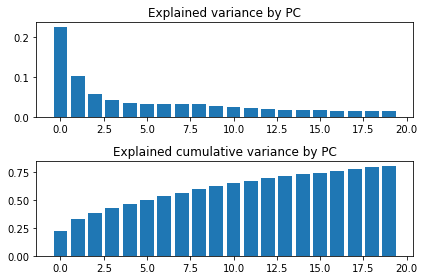

In [180]:
# plotting explained variance
fig, ax = plt.subplots(2, 1, tight_layout = True)
ax[0].bar(np.arange(n_components), pca.explained_variance_ratio_)
ax[0].set_title("Explained variance by PC")
ax[1].bar(np.arange(n_components), np.cumsum(pca.explained_variance_ratio_))
ax[1].set_title("Explained cumulative variance by PC")
print("Explained variance with last LT: ", np.cumsum(pca.explained_variance_ratio_)[-1])

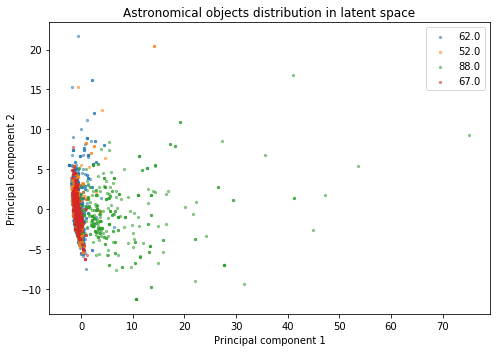

In [181]:
# plotting data projection with PCA
fig, ax  = plt.subplots(figsize = (7,5), tight_layout = True)
for label in pca_df.target.unique():
    
    ax.scatter(pca_df.loc[pca_df.target == label, 0], pca_df.loc[pca_df.target == label, 1], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))
#     ax.scatter(pca_df.iloc[:, 4], pca_df.iloc[:, 5], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))
    ax.set_xlabel("Principal component 1")
    ax.set_ylabel("Principal component 2")
    ax.set_title("Astronomical objects distribution in latent space")
plt.legend()
# for i, txt in enumerate(pca_df["label"]):
# #     print(txt)
#     ax.annotate(txt, (pca_df.iloc[i, 0], pca_df.iloc[i,1]))
    

# Dimensionality reduction with Autoencoder

In [67]:
import torch

# Building autoencoder
class Encoder(torch.nn.Module):
    
    def __init__(self, latent_dim, input_dim = len(features_names), hidden_dim = 10):

        super(Encoder, self).__init__()
        self.hidden_1 = torch.nn.Linear(input_dim, hidden_dim)
        self.hidden_2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.code = torch.nn.Linear(hidden_dim, latent_dim)
        self.activation = torch.nn.Softplus()

    def forward(self, x):
        
        output = self.activation(self.hidden_1(x))
        output = self.activation(self.hidden_2(output))
        
        return (self.code(output))

class Decoder(torch.nn.Module):
    
    def __init__(self, latent_dim, output_dim = len(features_names), hidden_dim = 10):
        super(Decoder, self).__init__()
        self.hidden_1 = torch.nn.Linear(latent_dim, hidden_dim)
        self.hidden_2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.decode = torch.nn.Linear(hidden_dim, output_dim)
        self.activation = torch.nn.Softplus()
        
    def forward(self, z):
#         print("Decoder")
        output = self.activation(self.hidden_1(z))
        output = self.activation(self.hidden_2(output))
        
        return (self.decode(output))
        
class AutoEncoder(torch.nn.Module):
    
    def __init__(self, latent_dim,):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)
        
    def forward(self, x):
        
        return self.decoder(self.encoder(x))

In [68]:
from torch.utils import data

# model = AutoEncoder(latent_dim = 1)

# Create dataset
torch_data = torch.from_numpy(std_features_light_curves).float()
torch_targets = torch.tensor(features_light_curves.iloc[:, -1].values).float()

dataset = data.TensorDataset(torch_data,torch_targets) # create your datset
train_loader = data.DataLoader(dataset, batch_size=256) # create your dataloader

In [72]:
from tqdm import tqdm_notebook

model = AutoEncoder(latent_dim = 2)

criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

use_gpu = False

if use_gpu:
    model = model.cuda()
    
# fig, ax = plt.subplots()

for nepoch in tqdm_notebook(range(10)):
    
#     print(nepoch)
    
    epoch_loss = 0
    
    for data, label in train_loader:
        
        optimizer.zero_grad()
        
        outputs = model.forward(data.type(torch.FloatTensor))
        
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print("Epoch {0} loss: {1}".format(nepoch, epoch_loss))

Epoch 0 loss: -164135995737.63257
Epoch 1 loss: -123173547572224.0
Epoch 2 loss: -4114638341931008.0
Epoch 3 loss: -4.040411709649715e+16
Epoch 4 loss: -2.1107170253943603e+17
Epoch 5 loss: -7.579870634956554e+17
Epoch 6 loss: -2.1315435576332124e+18
Epoch 7 loss: -5.05310359081871e+18
Epoch 8 loss: -1.056802150432532e+19
Epoch 9 loss: -2.0088493029093016e+19



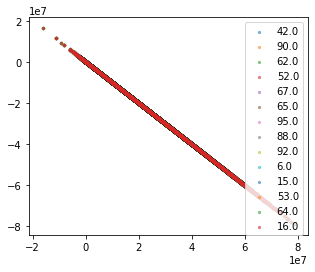

In [74]:
# get latent representation of data
latent_representation = model.encoder(torch_data.type(torch.FloatTensor)).detach().numpy()

# Creating new DF
autoencoder_df = pd.DataFrame(data = latent_representation
             , columns = ['lv 1', 'lv 2'])

# autoencoder_df["object_id"] = object_ids
autoencoder_df["target"] = features_light_curves["target"].values
autoencoder_df.head()

# plotting latent representation
fig, ax  = plt.subplots(figsize = (5,4))
for label in autoencoder_df.target.unique():
    
    ax.scatter(autoencoder_df["lv 1"], autoencoder_df["lv 2"], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))
plt.legend()
# for i, txt in enumerate(pca_df["label"]):
# #     print(txt)
#     ax.annotate(txt, (pca_df.iloc[i, 0], pca_df.iloc[i,1]))

# Supervised classification

In [182]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# LR with PCA
clf = LogisticRegression(random_state=0).fit(pca_df.iloc[:, 0:(pca_df.columns.shape[0] - 1)], pca_df["target"])
print("Score with PCA: ", clf.score(pca_df.iloc[:, 0:(pca_df.columns.shape[0] - 1)], pca_df.iloc[:, -1]))


# # # LR with Autoencoder
# clf = LogisticRegression(random_state=0).fit(autoencoder_df[["lv 1", "lv 2"]], autoencoder_df["target"])
# print("Score with Autoencoder: ", clf.score(autoencoder_df.iloc[:, 0:2], autoencoder_df.iloc[:, -1]))

# LR with raw data
clf = LogisticRegression(random_state=0).fit(features_light_curves.iloc[:, 0:(features_light_curves.columns.shape[0] - 1)], features_light_curves["target"])
print("Score with raw data: ", clf.score(features_light_curves.iloc[:, 0:(features_light_curves.columns.shape[0] - 1)], features_light_curves["target"]))

Score with PCA:  0.6733762748255502
Score with raw data:  0.642512077294686


/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
